Task-2:
Description: Develop a machine learning model to detect fraudulent transactions in a financial dataset.



Data Collection


In [47]:
import pandas as pd

In [6]:
data=pd.read_csv('creditcard.csv')
print(data)

      Time        V1        V2        V3        V4        V5        V6  \
0        0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2        1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3        1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4        2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...    ...       ...       ...       ...       ...       ...       ...   
3968  3617  1.134592  0.252051  0.488592  0.799826 -0.264819 -0.369918   
3969  3621 -1.338671  1.080974  1.291196  0.719258  0.101320  0.053896   
3970  3622 -0.339728 -2.417449  0.975517  2.537995 -1.720361  0.863005   
3971  3623 -0.368639  0.947432  1.707755  0.932092  0.292956  0.189100   
3972  3624 -0.663445  1.162921  1.508050  0.549405  0.231377 -0.106041   

            V7        V8        V9  ...       V21       V22       V23  \
0     0.239599  0.098698  0.363787  ..

data pre processing

In [13]:
# Check for missing values
print(data.isnull().sum())

# If missing values exist, handle them (example: drop or fill)
data = data.dropna()

print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


balance the dataset


In [20]:
from imblearn.over_sampling import SMOTE

# Determine the number of samples in your minority class
minority_class_samples = y.value_counts().min()

# Set k_neighbors to be less than or equal to the number of minority samples
k = min(3, minority_class_samples - 1)
smote = SMOTE(random_state=42, k_neighbors=k)

X_res, y_res = smote.fit_resample(X, y)

print(y_res.value_counts())

Class
0.0    3970
1.0    3970
Name: count, dtype: int64


*Feature* Engineering


In [22]:
# Example: Creating a new feature 'TransactionHour'
if 'Time' in data.columns:  # Check if 'Time' column exists
    data['TransactionHour'] = data['Time'] // 3600

    # Drop original 'Time' column if necessary
    data = data.drop(columns=['Time'])

# Verify the new feature
print(data.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  TransactionHour  
0 

Exploratory Data Analysis[EDA]


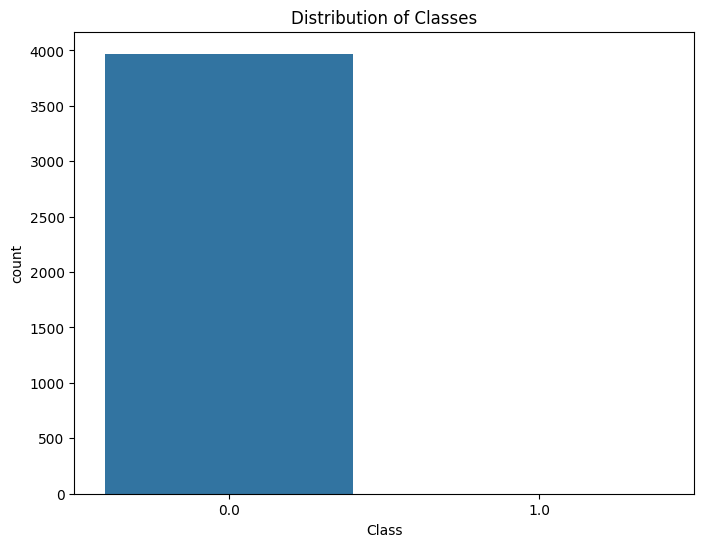

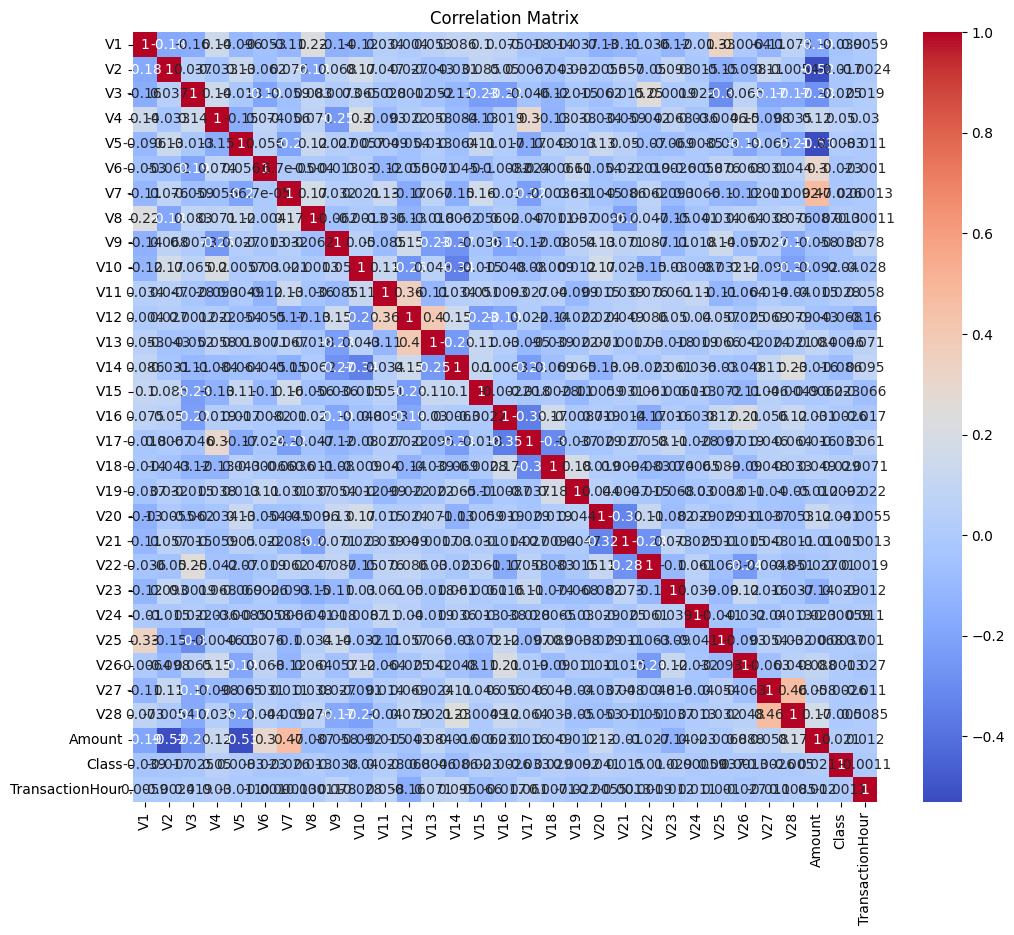

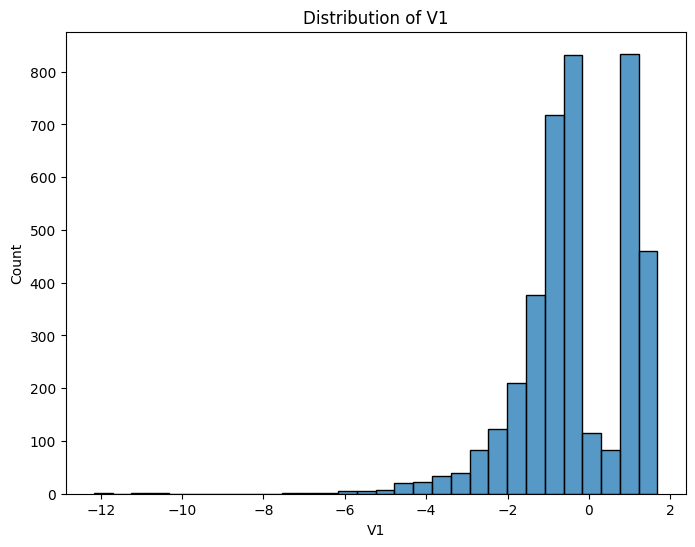

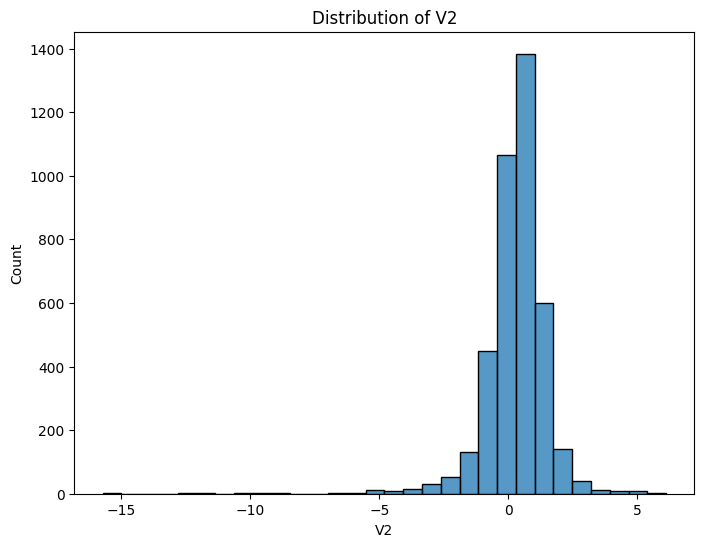

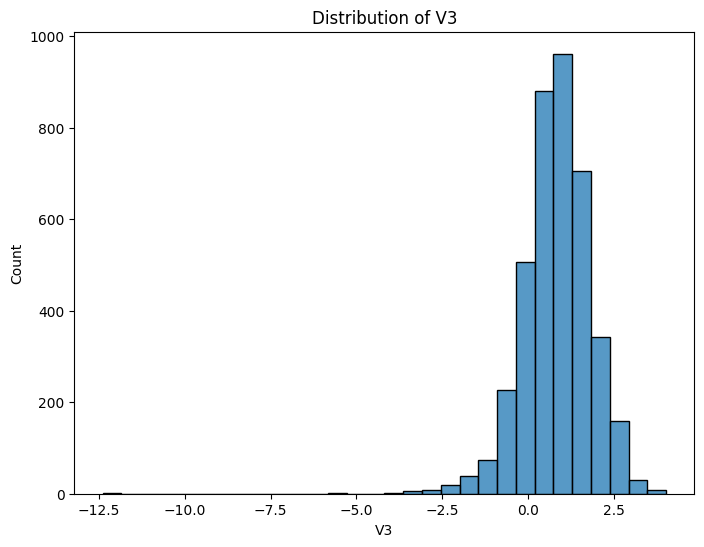

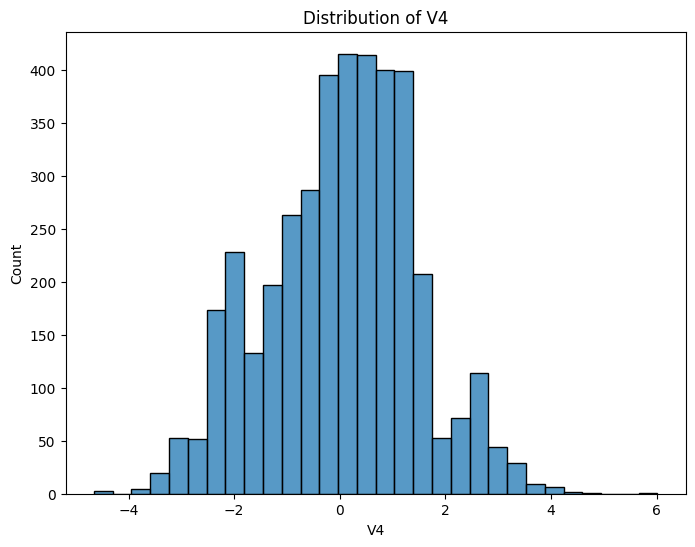

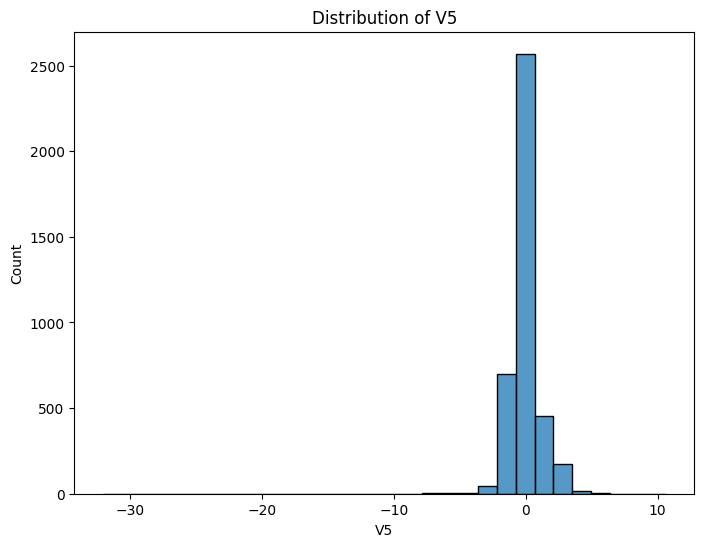

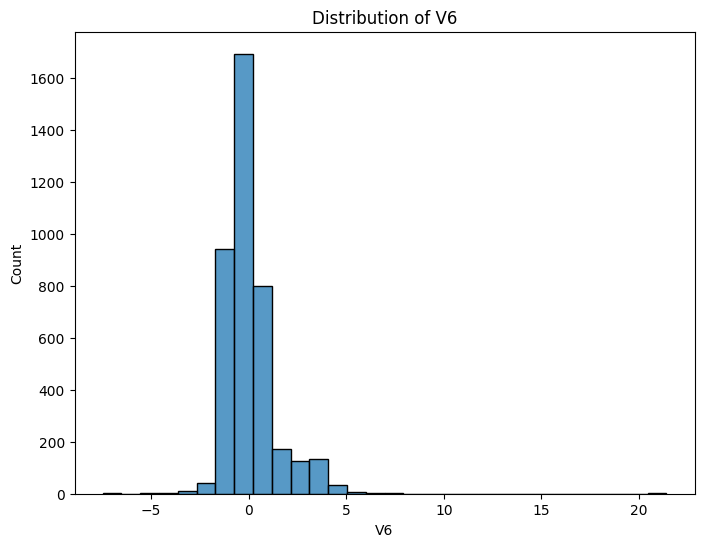

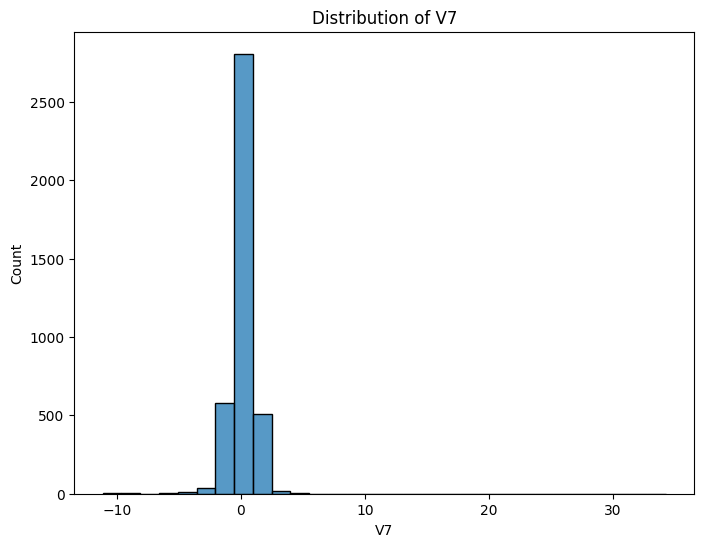

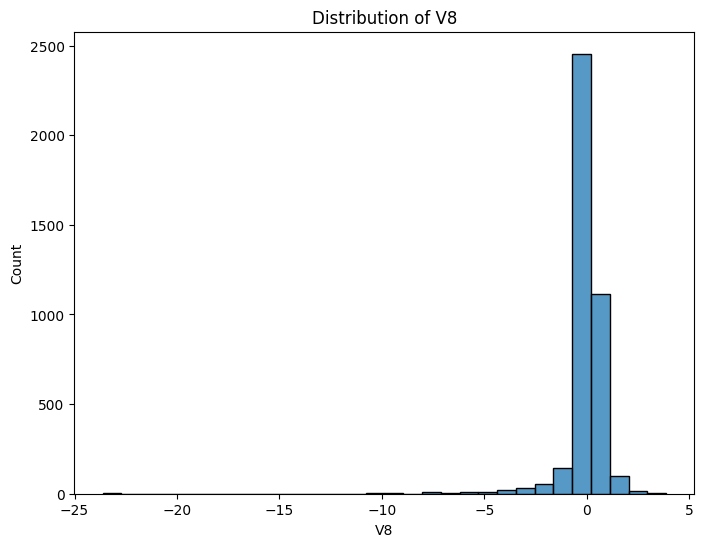

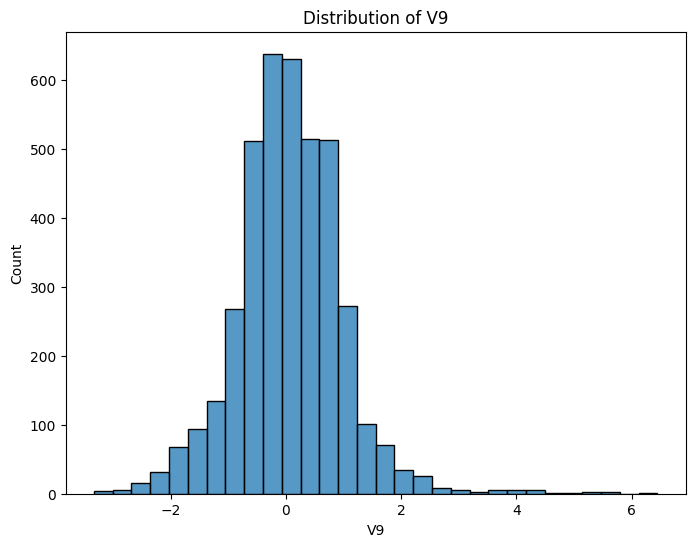

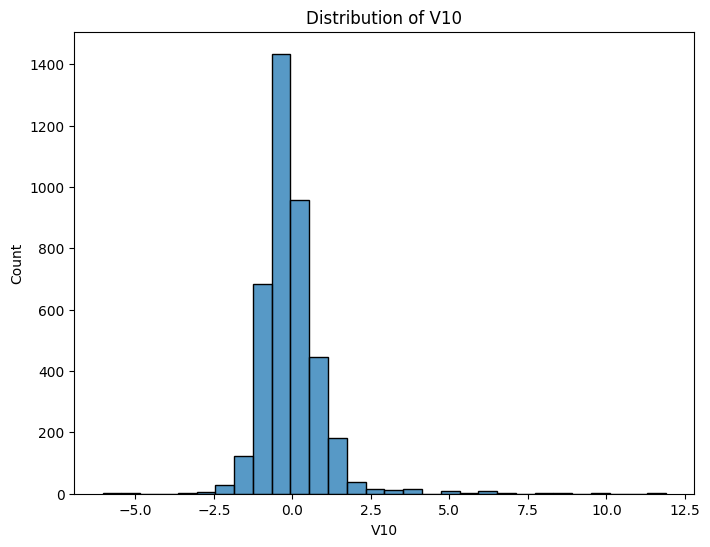

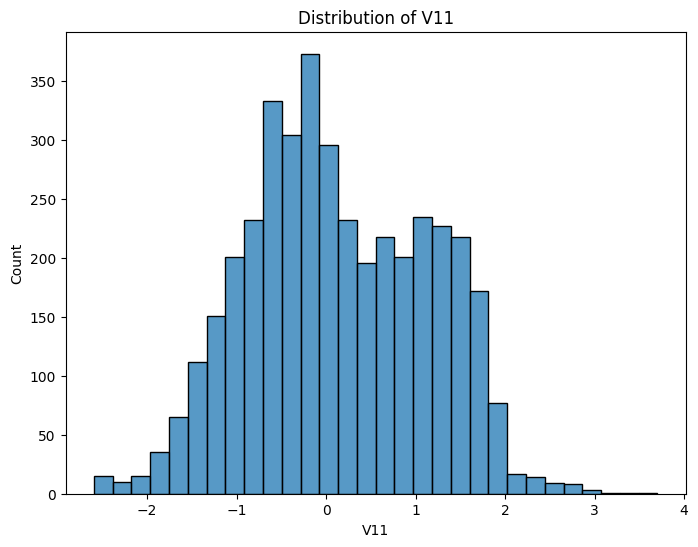

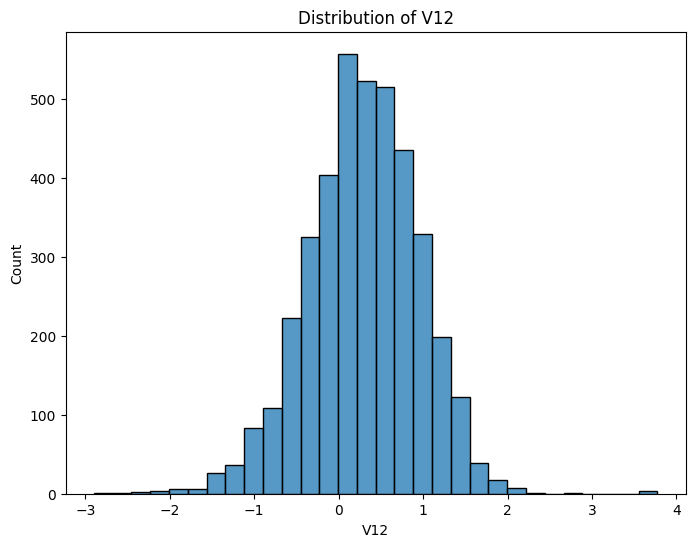

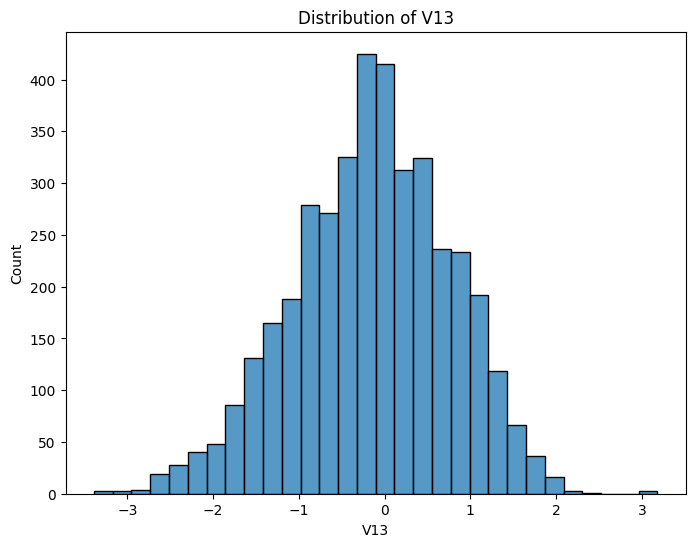

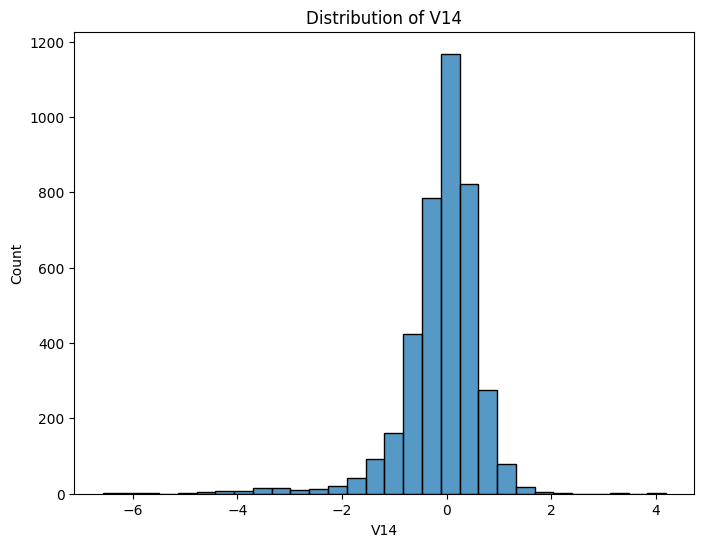

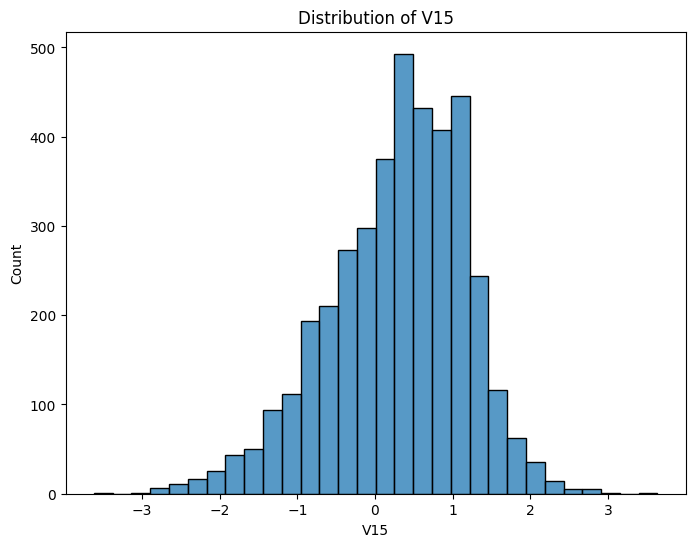

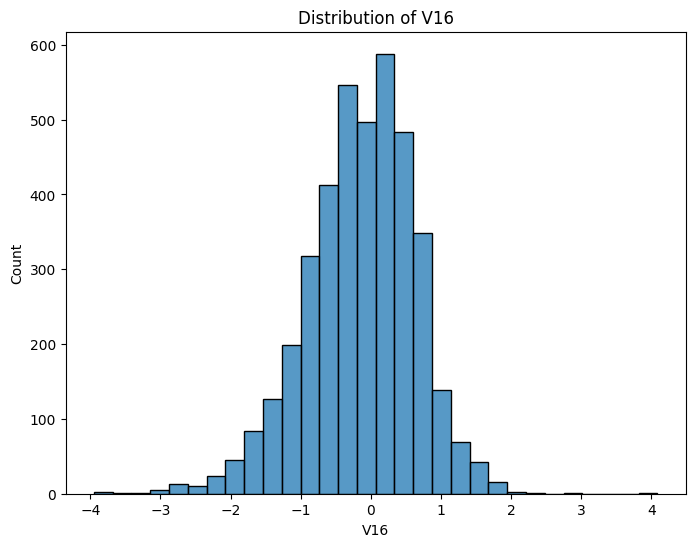

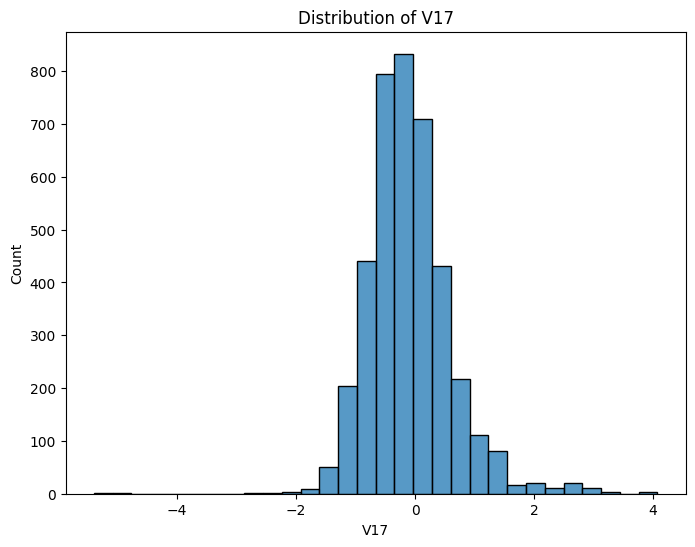

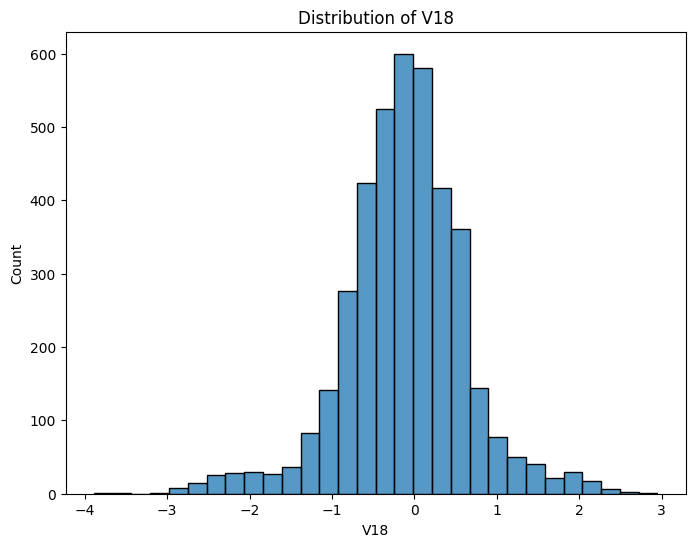

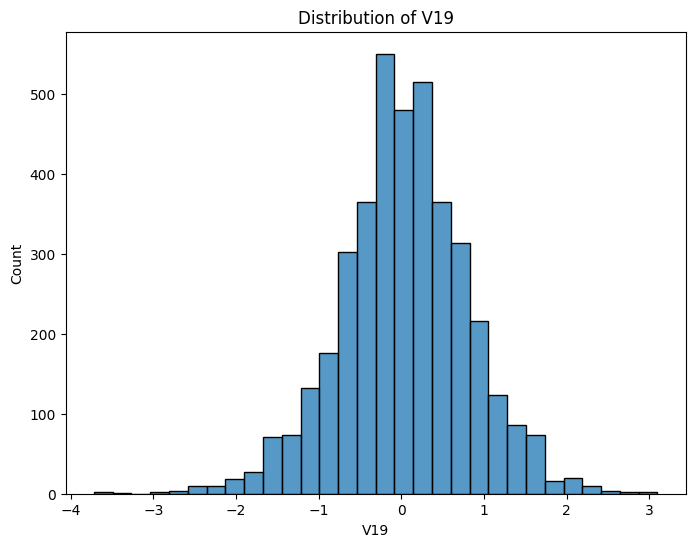

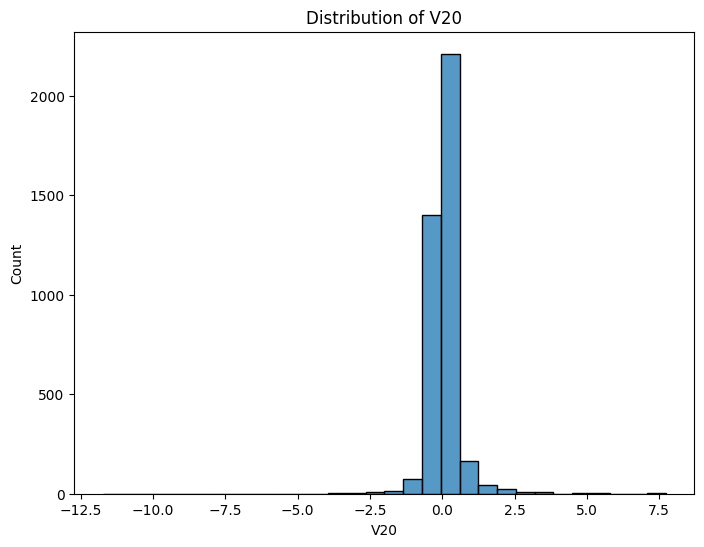

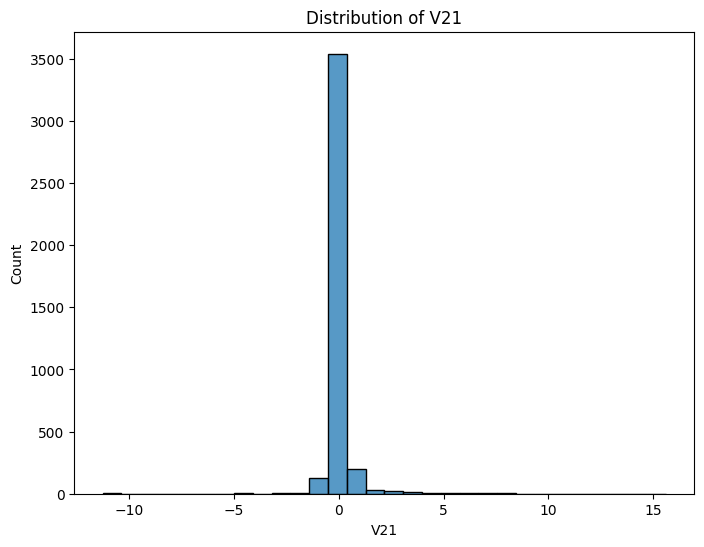

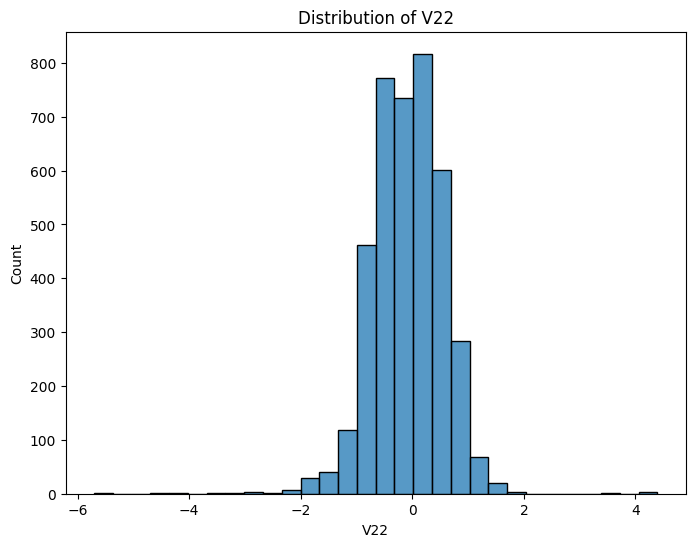

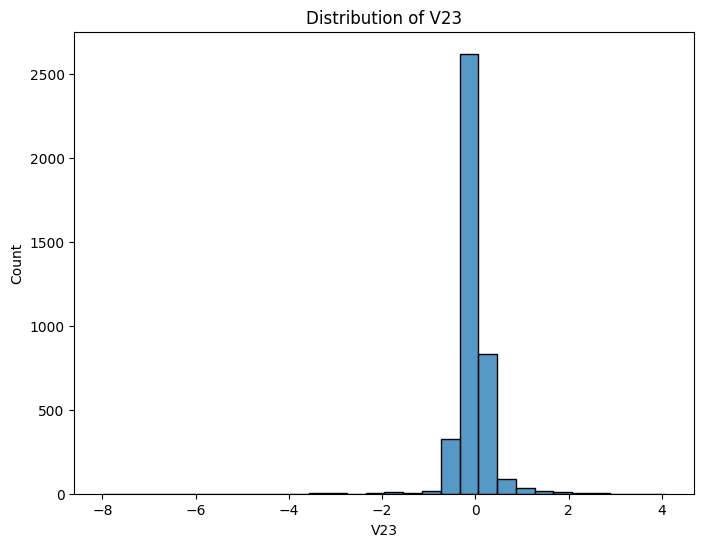

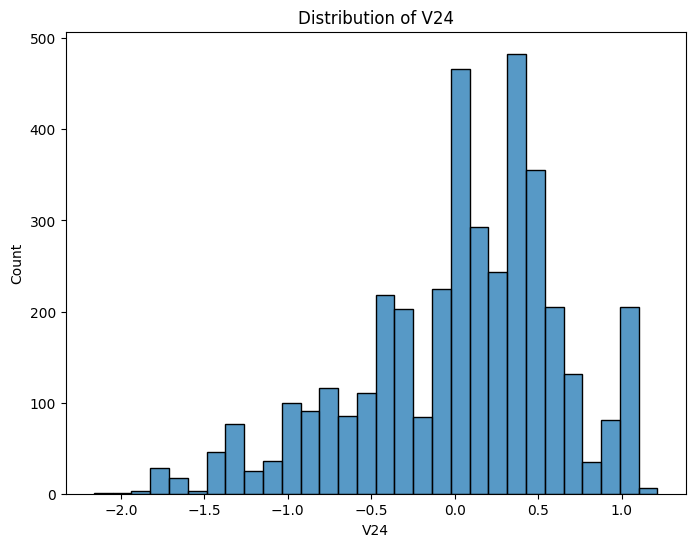

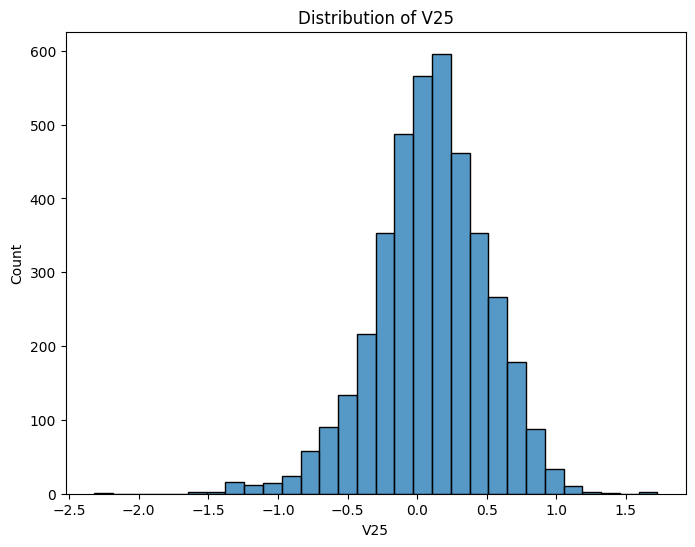

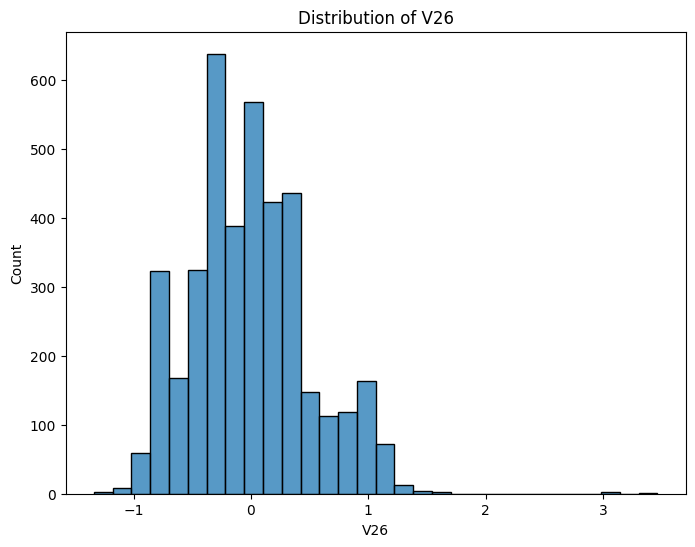

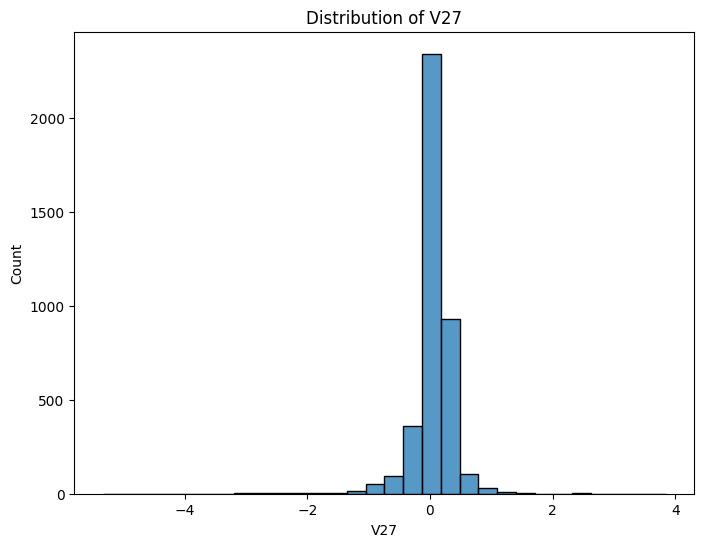

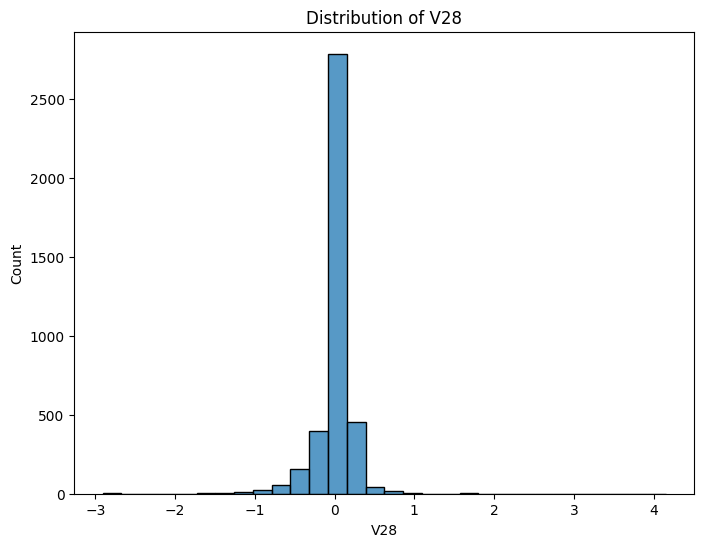

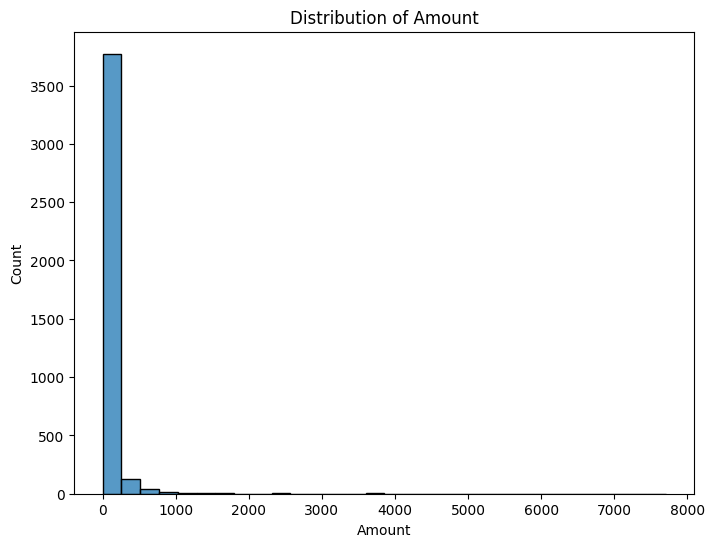

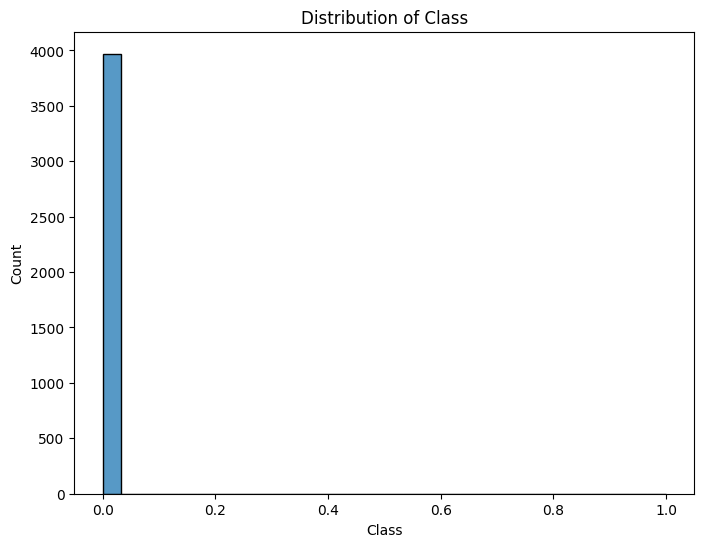

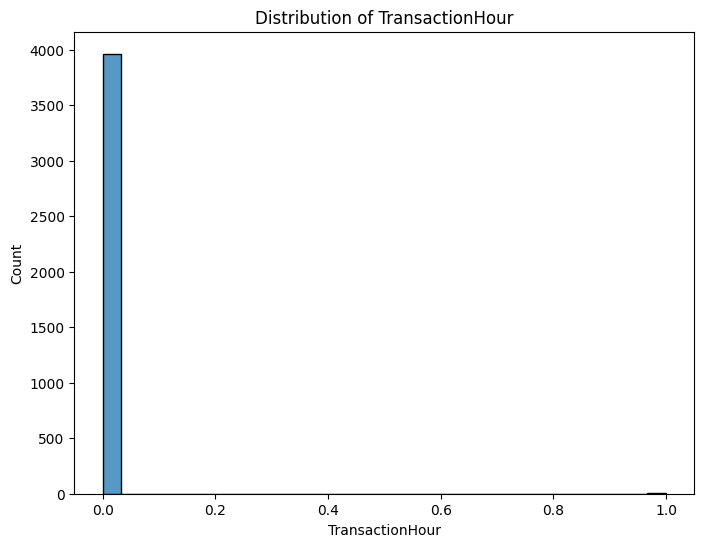

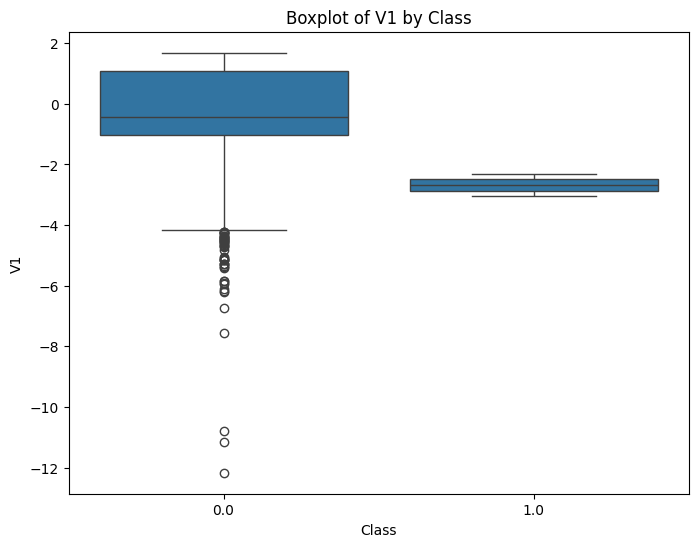

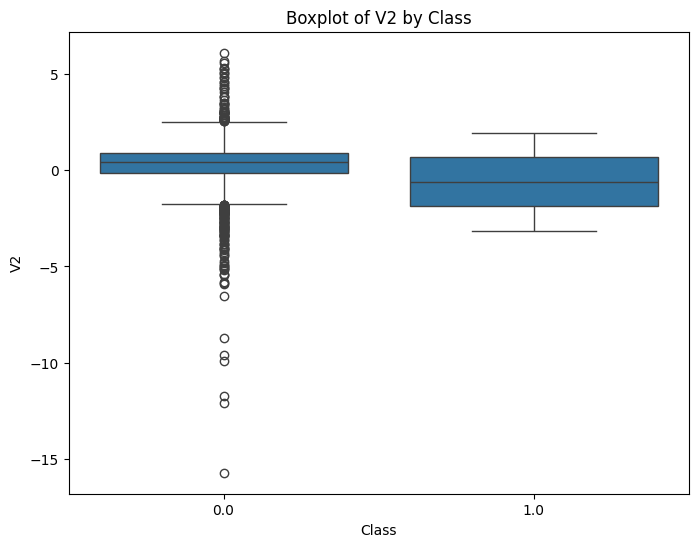

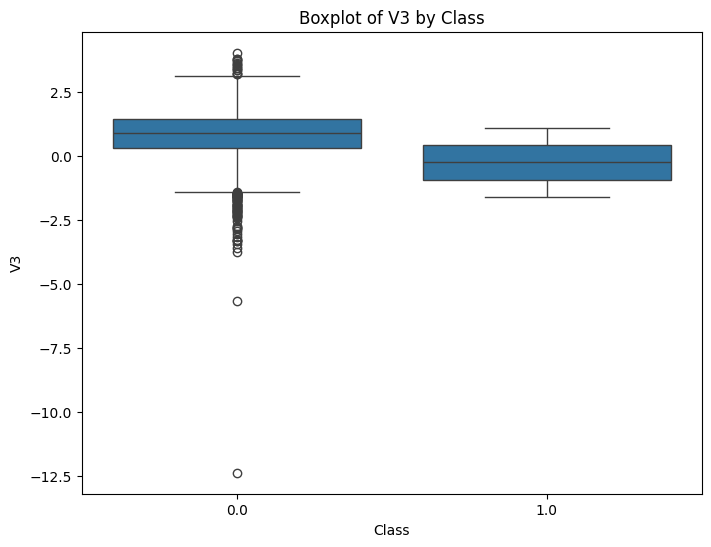

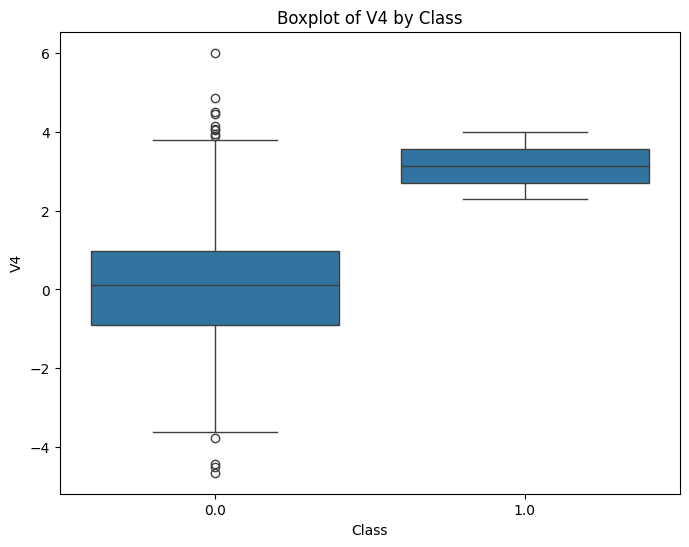

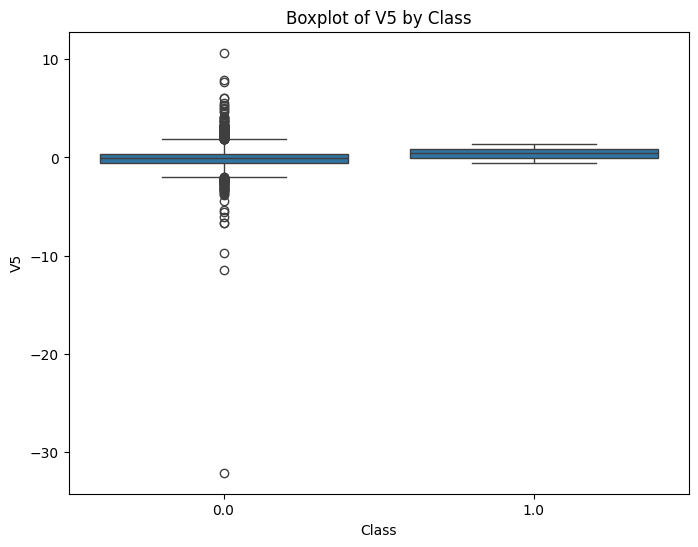

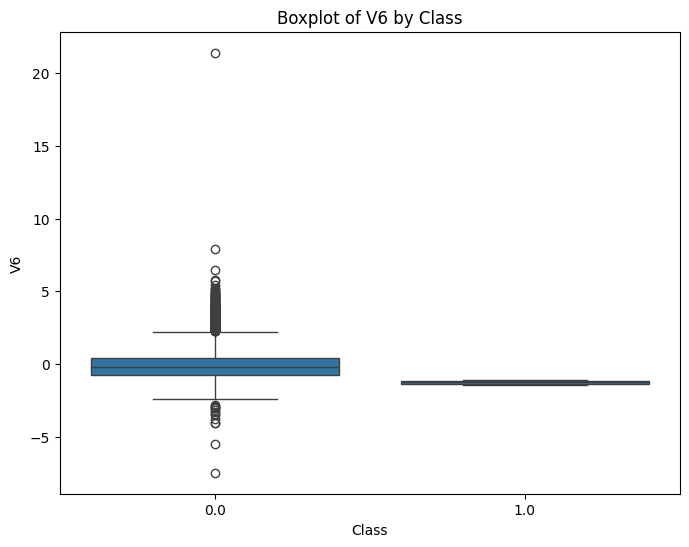

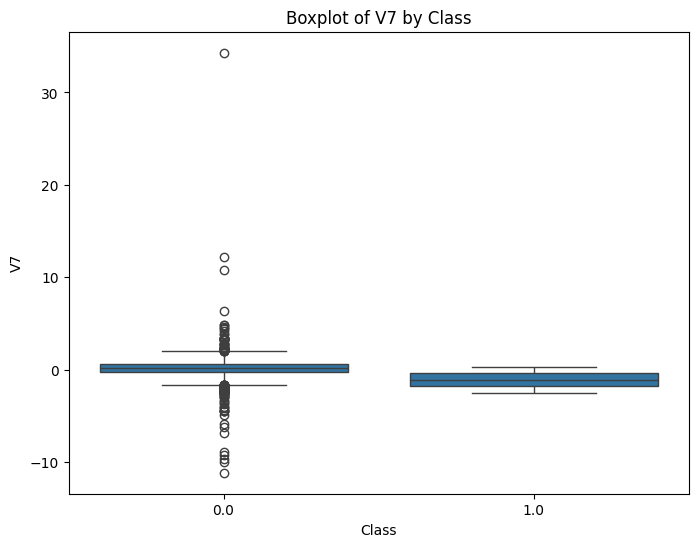

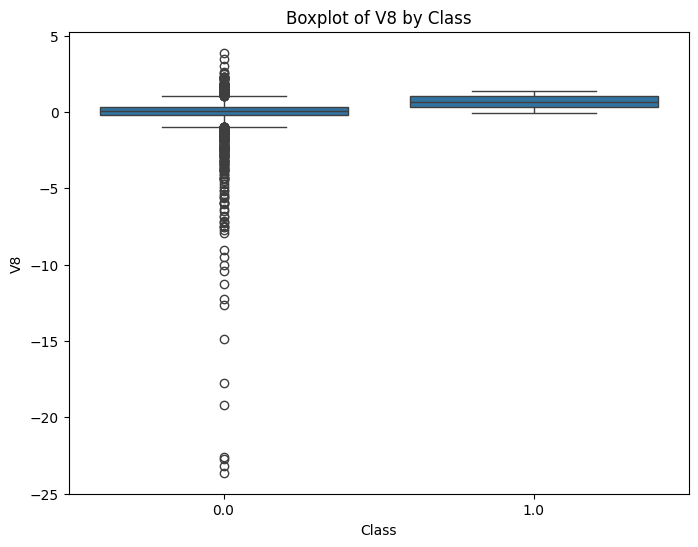

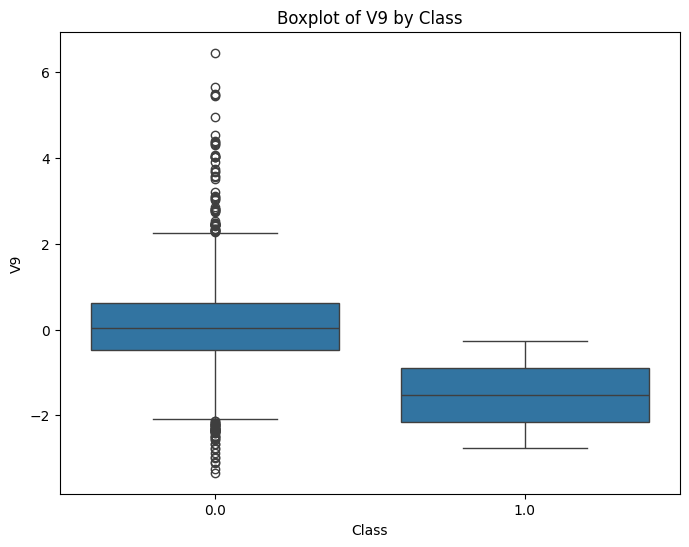

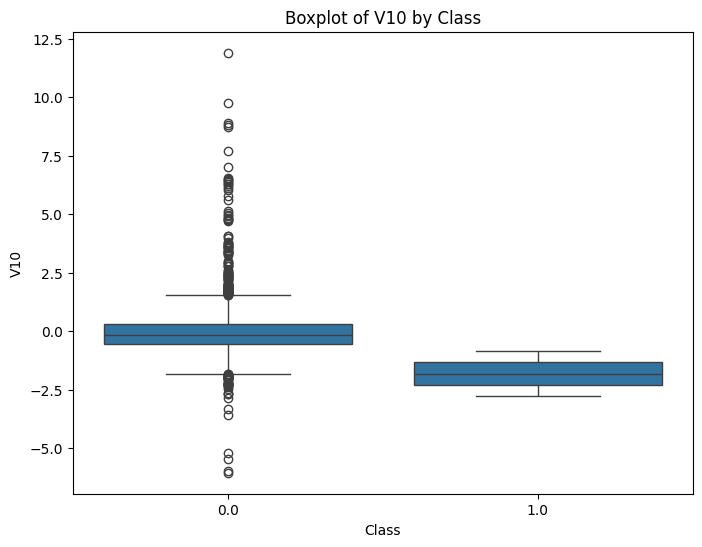

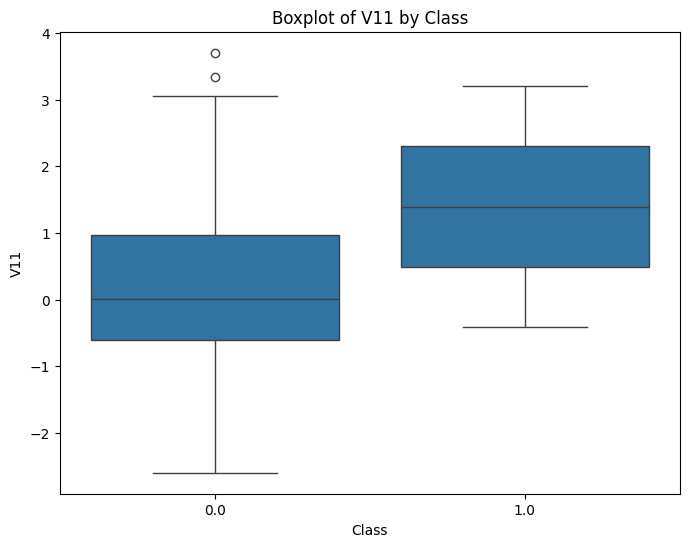

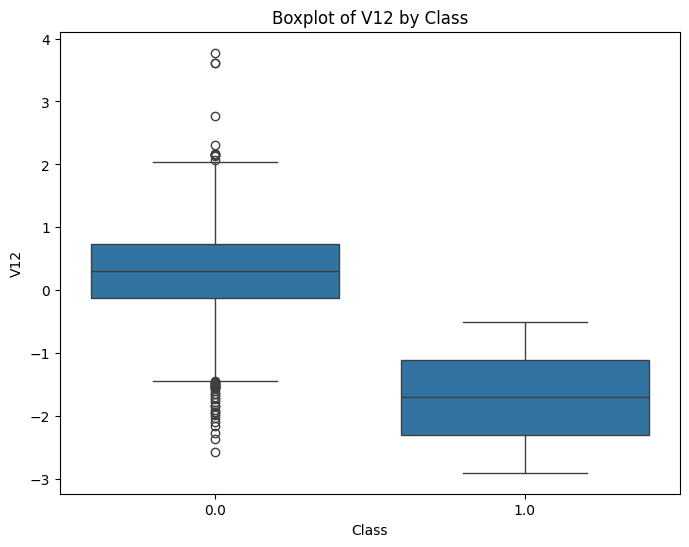

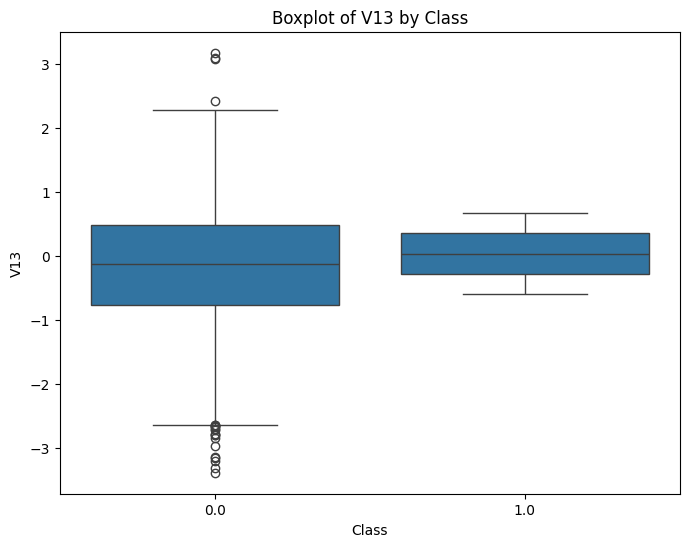

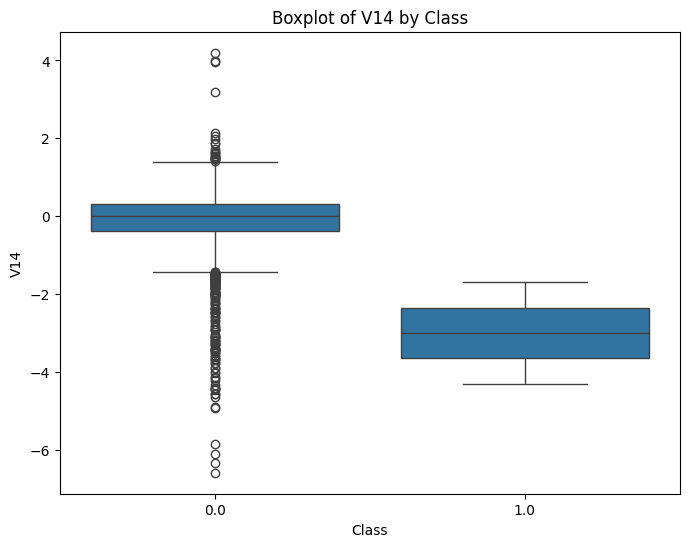

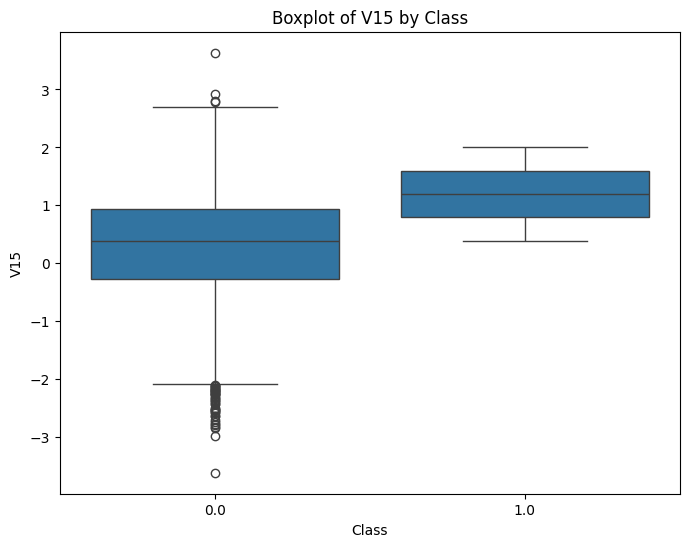

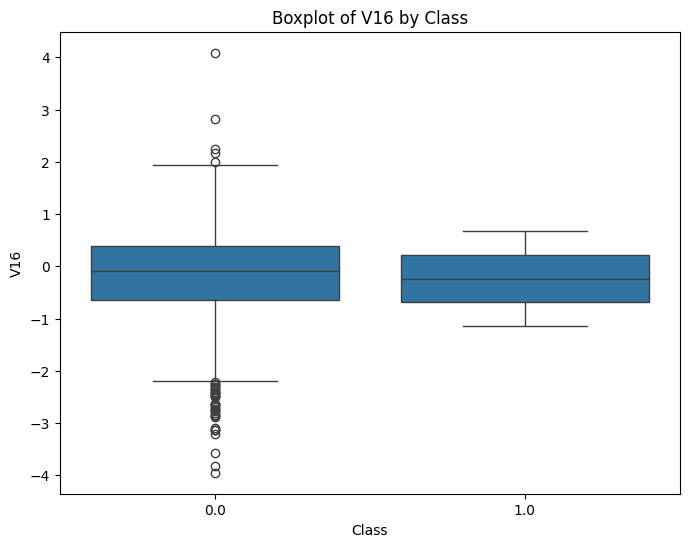

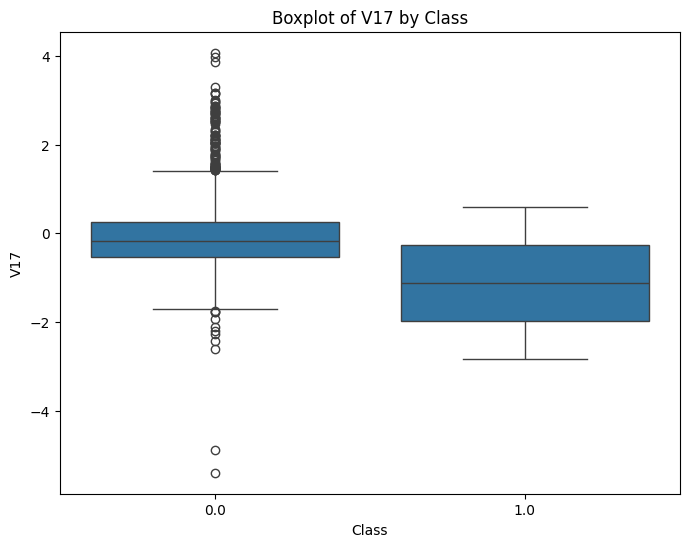

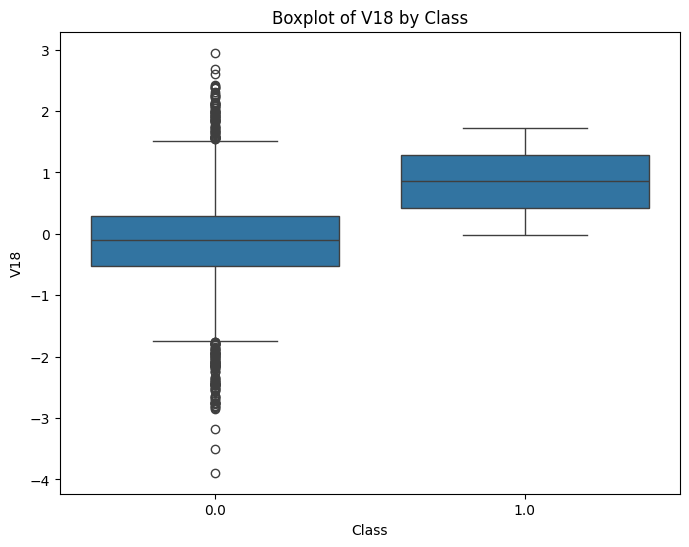

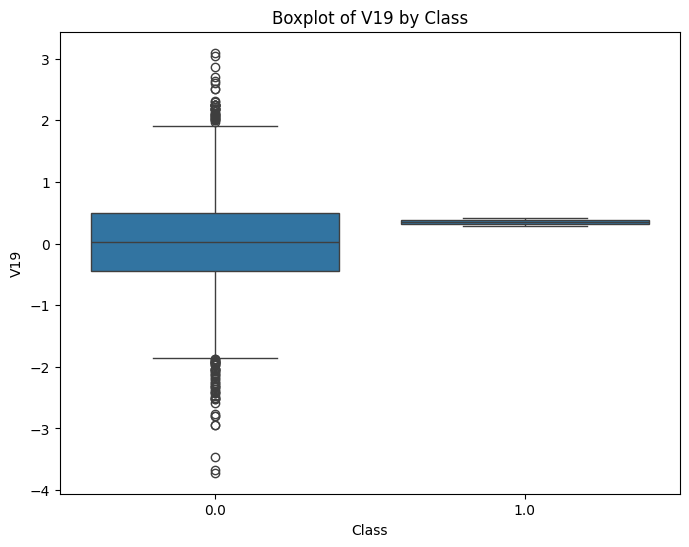

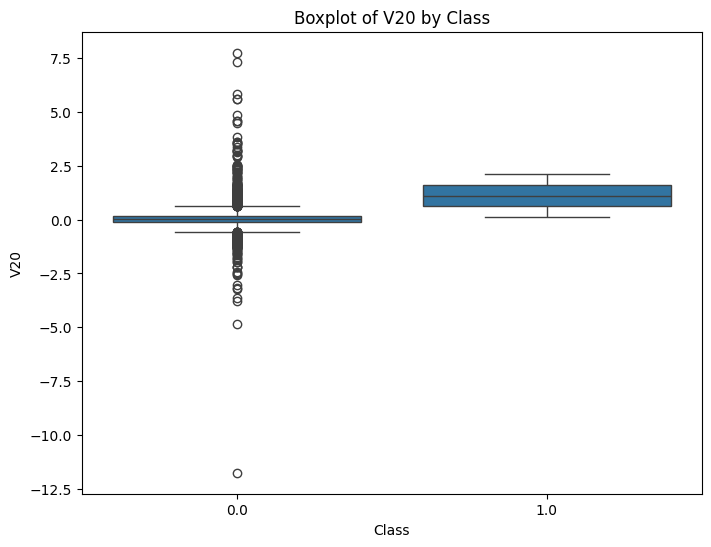

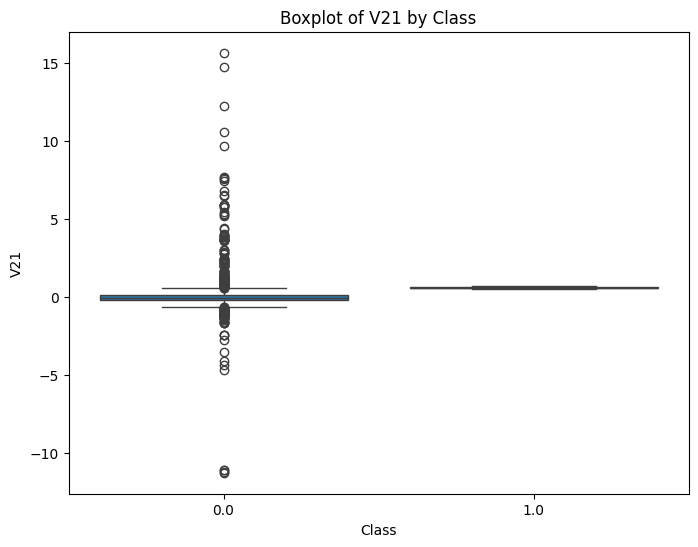

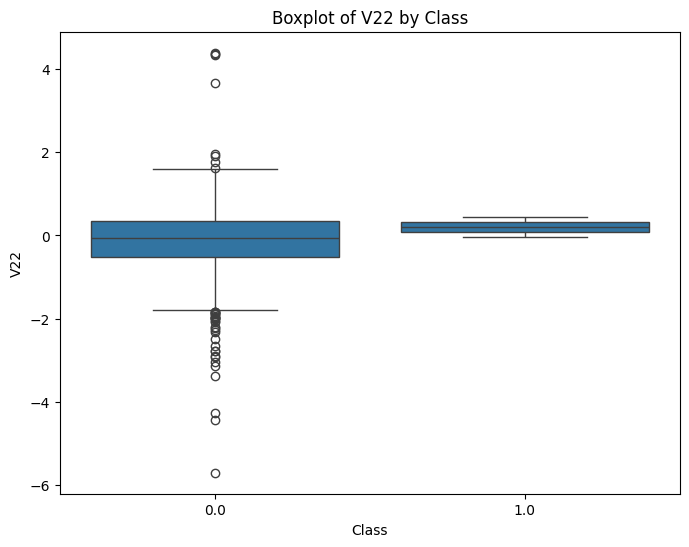

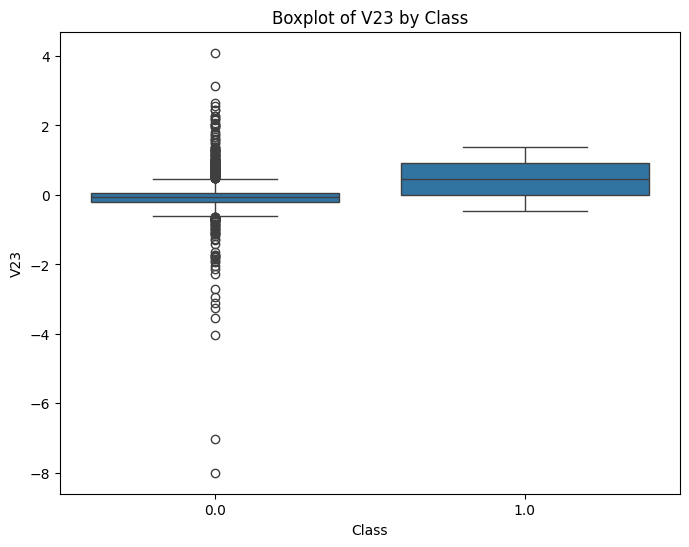

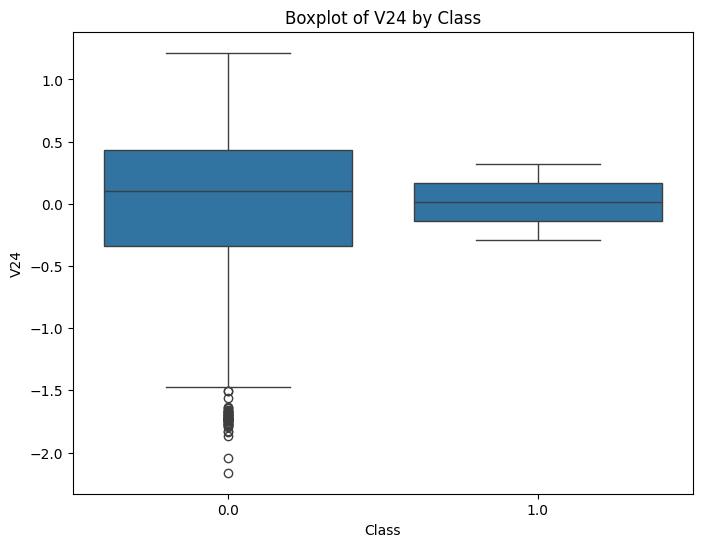

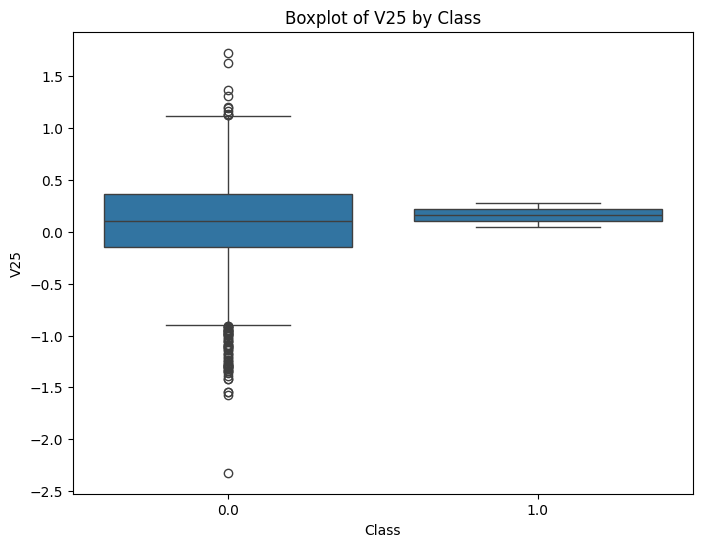

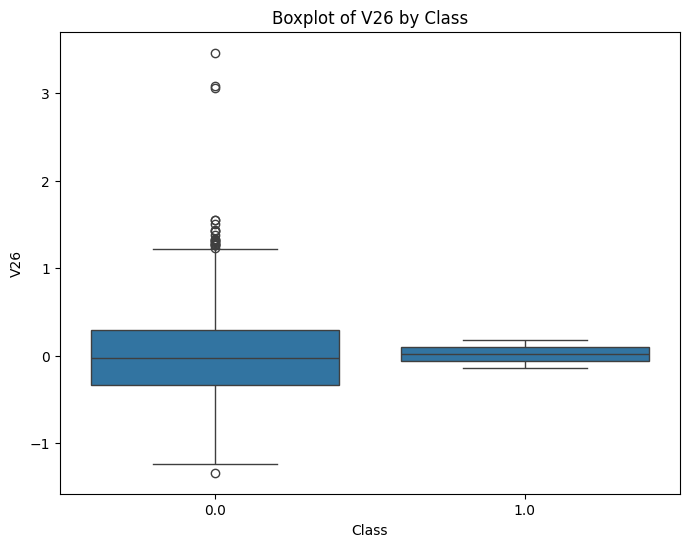

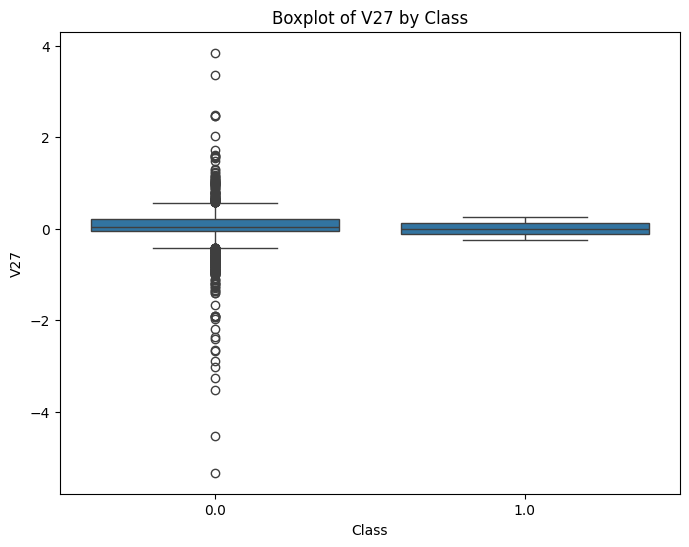

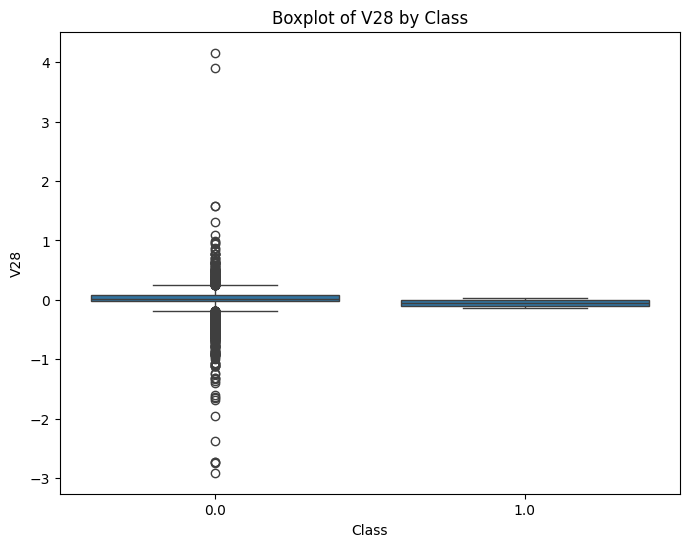

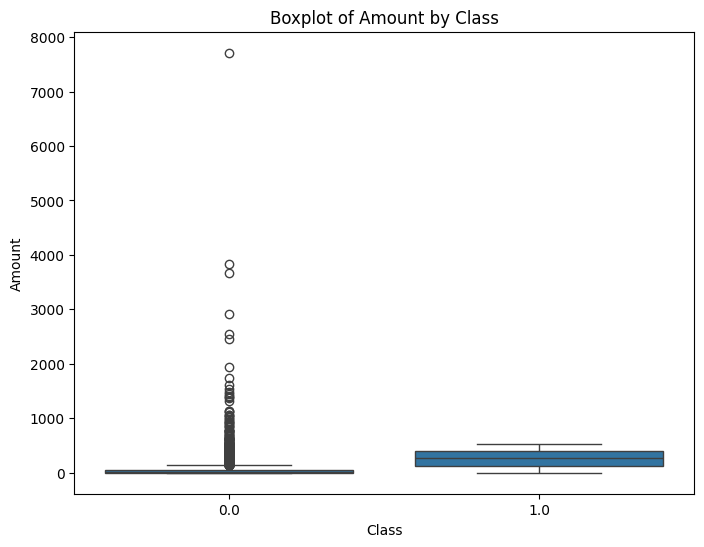

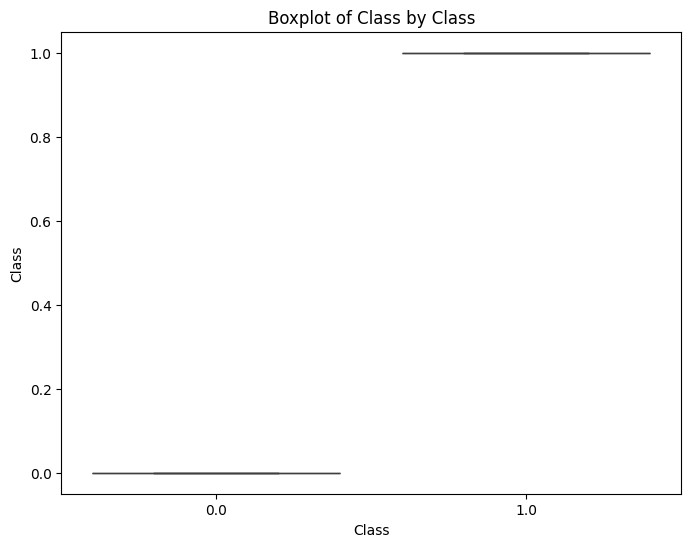

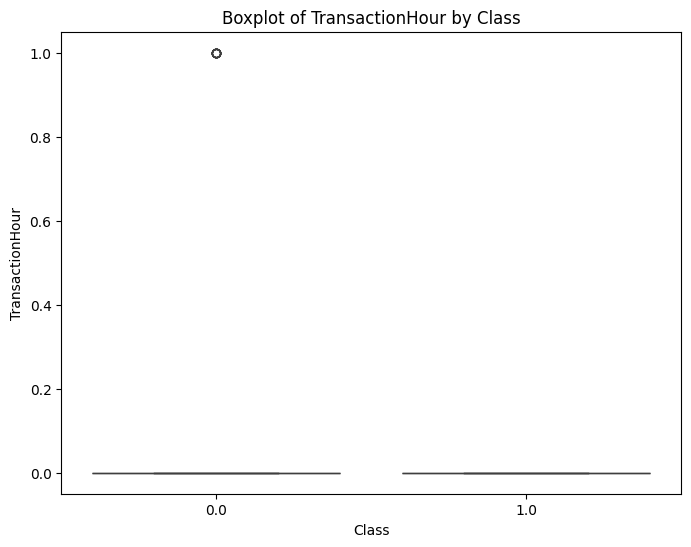

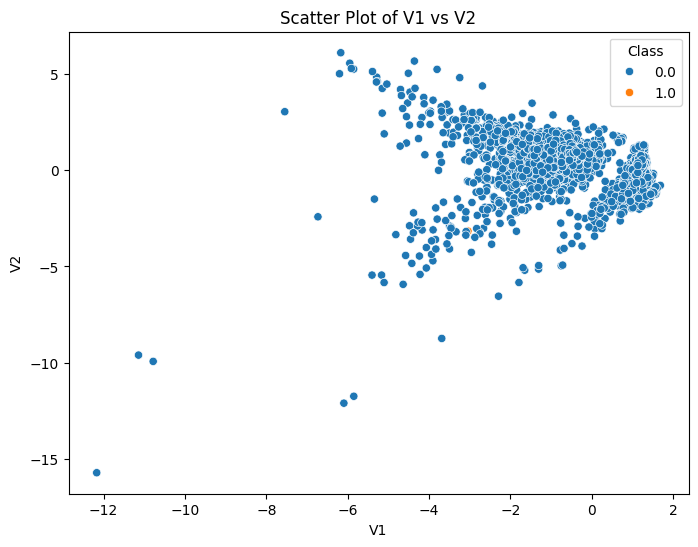

In [45]:
# prompt: Visualize patterns and anomalies in the data using graphs and statistics.

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)  # Assuming 'Class' is your target variable
plt.title('Distribution of Classes')
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Histograms for Numerical Features
numerical_features = data.select_dtypes(include=['float', 'int']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Boxplots for Anomaly Detection
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Class', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Class')
    plt.show()

# Scatter Plots for Relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x='V1', y='V2', hue='Class', data=data)  # Example features
plt.title('Scatter Plot of V1 vs V2')
plt.show()


Model Selection


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC()
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)


Model Training


In [27]:
rf_model.fit(X_res, y_res)
svm_model.fit(X_res, y_res)
nn_model.fit(X_res, y_res)


MLPClassifier(max_iter=500, random_state=42)

Model Evaluation

In [36]:
from sklearn.model_selection import train_test_split # Import the missing function

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [37]:
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [39]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = model.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [42]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
